<a href="https://colab.research.google.com/github/diegopescoalcalde/portfolio/blob/master/Airbnb_Data_Analysis_San_Francisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Airbnb Data Analysis - *San Francisco (USA)*
---
*by [Diego Pesco Alcalde](https://www.linkedin.com/in/diegopesco/)*

<br>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018 a Startup fundada 10 anos atrás já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, irei analisar os dados referentes à cidade de San Francisco, nos Estados Unidos, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados analisados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* listings.csv - Summary information and metrics for listings in San Francisco (good for visualisations).


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2020-05-06/visualisations/listings.csv")

## Análise dos Dados


Nesta seção os dados são visualizados e transformados para encontrar informações relevantes para o projeto. Nenhum projeto de Data Science inicia sem um objetivo, portanto essas transformações são realizadas em busca de validar ou invalidar teorias e hipóteses. Este exemplo tem por objetivo demonstrar apenas algumas das diferentes informações que se pode extrair de um conjunto de dados, e como elas podem ser utilizadas.

<br>

**Dicionário das variáveis**

Dicionário das variáveis

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a estrutura do *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,241,2020-03-28,1.83,1,118
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.83,1,0
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,19,2020-03-06,0.15,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,8,2018-09-12,0.12,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,714,5,28,2019-06-28,0.22,2,365


### **Pré-processamento dos dados - Dimensão e formato**

O pré-processamento dos dados é uma etapa crítica para o sucesso do projeto. Nesta etapa uma primeira análise é realizada para verificar a integridade dos dados e identificar possíveis anomalias, que podem gerar erros no código ou fornecer resultados errados quando analisadas pelos modelos.

<br>

Para que o processamento correto dos dados seja realizado também é importante que eles estejam em formatos específicos. Para tal, uma verificação inicial é recomendada e, se necessário, os formatos passam por transformações.

<br>

Em muitos problemas de Data Science a dimensão do conjunto de dados é um parâmetro relevante para determinar a melhor estratégia de processamento dos dados, levando em conta os objetivos do estudo e o custo computacional envolvido. Assim, essa informação também será investigada.



In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))
print("\n")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 8078
Variáveis:	 16




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Para o objetivo do estudo os formatos obtidos parecem adequados. Em caso de necessidade a alteração do formato será realizada posteriormente.

### **Pré-processamento dos dados - Valores ausentes**

Um dos tipos de anomalia a serem resolvidos antes de partir para as transformações dos dados é a existência de valores ausentes. Estes podem gerar erros em operações e transformações dos dados e impactar os resultados finais.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.235331
last_review                       0.235331
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

Três colunas de dados apresentam valores ausentes. Existem diversas maneiras de lidar com esse problema, mas uma vez que as variáveis com valores ausentes neste exemplo estão fora do nosso objeto de estudo, essas colunas serão descartadas na sequência.
<br>

Com um dataset íntegro, variáveis nos formatos corretos e a dimensão dos dados conhecida, é hora de iniciar as análises.

### **Distribuição dos resultados** 

A análise prática é o primeiro passo na busca por respostas de um problema a partir dos dados. Antes de mergulhar em equações e transformações é importante entender se os dados fazem sentido. As dimensões e ordens de grandeza das variáveis são compatíveis com o esperado? Existem padrões ou sinais de anomalia? Existem dados suficientes para resolver o problema? Em muitos casos essa é a etapa onde a maior parte do tempo é investida para garantir o sucesso do estudo.

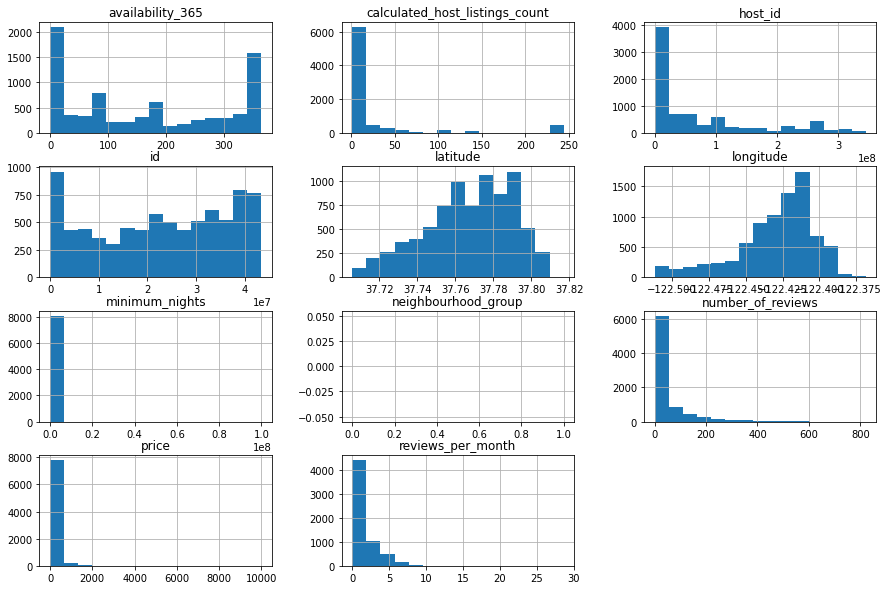

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

É possível observar a existência de alguns valores bastante discrepantes (por exemplo, um aluguel com a diária próxima a 8000 dólares, e uma propriedade com permanência mínima de mais de 8000 noites). Esses valores não necessariamente estão errados, mas em muitos casos eles não fazem parte do espaço de inferência do problema, e acabam por impactar a observação que se deseja com os dados. Para evitar esse impacto é possível eliminar esses valores do conjunto de dados usando dois métodos para detecção de outliers, IQR e Z-score.

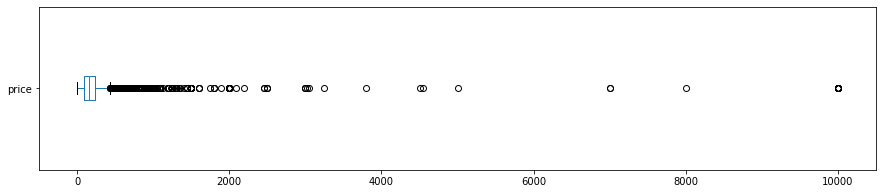


Limite superior estimado utilizando o primeiro método (IQR): 432.5

número de outliers estimados
635 entradas
7.8609%

Limite superior estimado utilizando o segundo método (Z): 1876.0801034631074

número de outliers estimados
51 entradas
0.6313%


In [ ]:
# box plot dos preços
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# primeiro método para cálculo de outliers
iqr = df.price.quantile(q=0.75) - df.price.quantile(q=0.25)
suplim1 = df.price.quantile(q=0.75) + (1.5*iqr)

# ver quantidade de anúncios acima do limite superior
print("\nLimite superior estimado utilizando o primeiro método (IQR): {}".format(suplim1))
print("\nnúmero de outliers estimados")
print("{} entradas".format(len(df[df.price > suplim1])))
print("{:.4f}%".format((len(df[df.price > suplim1]) / df.shape[0])*100))

# segundo método para cálculo de outliers
suplim2 = df.price.mean() + (3*df.price.std())

# ver quantidade de anúncios acima do limite superior
print("\nLimite superior estimado utilizando o segundo método (Z): {}".format(suplim2))
print("\nnúmero de outliers estimados")
print("{} entradas".format(len(df[df.price > suplim2])))
print("{:.4f}%".format((len(df[df.price > suplim2]) / df.shape[0])*100))


A diferença nos resultados obtidos pelos dois métodos mostra a importância do raciocínio crítico durante a análise dos dados. Escolher um método pela praticidade ou por costume sem entender o comportamento dos dados pode ter um impacto considerável nos números finais.

Para eliminar apenas erros nos dados e valores muito extremos será utilizado o valor de referência obtido pelo segundo método.

Repetindo a análise para a variável "Minimum Nights":


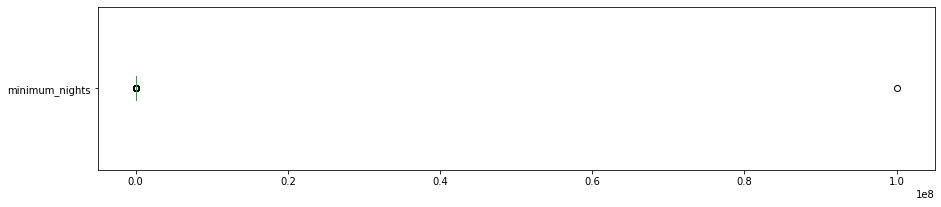


Limite superior estimado utilizando o primeiro método (IQR): 72.0

número de outliers estimados
99 entradas
1.2256%

Limite superior estimado utilizando o segundo método (Z): 3350265.869318325

número de outliers estimados
1 entradas
0.0124%


In [ ]:
# box plot de minimum nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# primeiro método para cálculo de outliers
iqr = df.minimum_nights.quantile(q=0.75) - df.minimum_nights.quantile(q=0.25)
suplim3 = df.minimum_nights.quantile(q=0.75) + (1.5*iqr)

# ver quantidade de anúncios acima do limite superior
print("\nLimite superior estimado utilizando o primeiro método (IQR): {}".format(suplim3))
print("\nnúmero de outliers estimados")
print("{} entradas".format(len(df[df.minimum_nights > suplim3])))
print("{:.4f}%".format((len(df[df.minimum_nights > suplim3]) / df.shape[0])*100))

# segundo método para cálculo de outliers
suplim4 = df.minimum_nights.mean() + (3*df.minimum_nights.std())

# ver quantidade de anúncios acima do limite superior
print("\nLimite superior estimado utilizando o segundo método (Z): {}".format(suplim4))
print("\nnúmero de outliers estimados")
print("{} entradas".format(len(df[df.minimum_nights > suplim4])))
print("{:.4f}%".format((len(df[df.minimum_nights > suplim4]) / df.shape[0])*100))

A existência de um único número digitado errado distorce a visualização do gráfico e também o valor estimado utilizando o método de Z score. Portanto o primeiro método (IQR) será utilizado como referência neste caso.

O Dataset é então alterado para eliminar os valores discrepantes e colunas que não serão necessárias ao estudo.

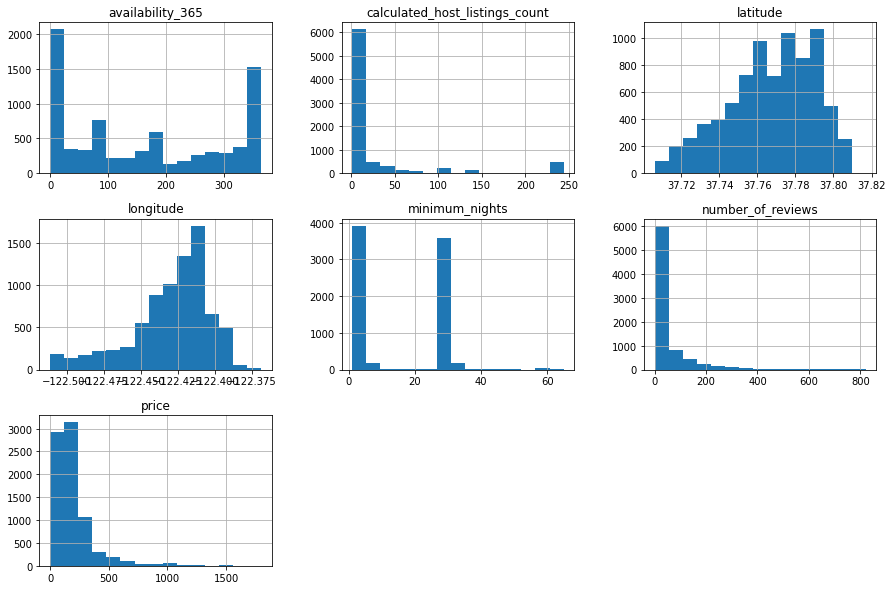

In [ ]:
#Eliminando colunas que não são necessárias para o estudo

df_clean = df.copy()
df_clean.dropna(axis=1, inplace=True)
df_clean.drop(['id', 'host_id'], axis=1, inplace=True)

#Eliminando valores discrepantes

df_clean.drop(df_clean[df_clean.price > suplim2].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > suplim3].index, axis=0, inplace=True)
df_clean.hist(bins=15, figsize=(15,10));

### **Qual a média dos preços de aluguel?**

Uma das variáveis que influencia na margem de lucro do Airbnb é o preço do aluguel, e outro é a demanda dos usuários. De posse de uma simples informação como a média do preço da diária na cidade a empresa pode desenvolver projetos ou iniciativas para ajustar o preço médio e otimizar a sua relação de margem e demanda, maximizando os lucros. Outra possibilidade é a comparação dos custos da diária em San Francisco diversas outras cidades.

In [ ]:
# ver a média da coluna `price``
display(df_clean.describe())
print("\n")
print("A média dos preços de aluguel é: US${:.2f}".format(df.price.mean()))
print("A média dos preços de aluguel eliminando os outliers é: US${:.2f}".format(df_clean.price.mean()))

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,7930.000000,7930.000000,7930.000000,7930.000000,7930.000000,7930.000000,7930.000000
mean,37.767125,-122.429600,196.969609,15.880832,45.308197,26.413367,163.312863
std,0.022946,0.026904,181.530508,14.247919,82.082192,59.876923,138.739619
min,37.705860,-122.511630,0.000000,1.000000,0.000000,1.000000,0.000000
25%,37.752365,-122.442397,95.000000,2.000000,1.000000,1.000000,20.000000
50%,37.770375,-122.423840,149.000000,6.000000,9.000000,2.000000,146.000000
75%,37.786718,-122.410150,227.750000,30.000000,52.000000,14.000000,309.000000
max,37.817040,-122.368570,1800.000000,65.000000,821.000000,244.000000,365.000000




A média dos preços de aluguel é: US$231.39
A média dos preços de aluguel eliminando os outliers é: US$196.97


O exemplo acima demonstra o impacto que valores discrepantes podem ter na análise dos dados. A remoção de alguns poucos dados com preços de aluguel acima de 1876 dólares reduziu o valor da média dos aluguéis em San Francisco em aproximadamente 15%. Mas o valor que realmente deve ser utilizado sempre depende do que se deseja concluir com essa informação.

### **Qual a correlação existente entre as variáveis?**

A existência de correlação entre as variáveis do problema é uma etapa importante quando se busca entender como elas interagem, e permite que um primeiro filtro seja aplicado nos dados, restringindo um determinado problema a uma quantidade menor de variáveis.

In [ ]:
# criar uma matriz de correlação
corr=df_clean.corr()
# mostrar a matriz de correlação
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.204257,0.117661,0.164579,-0.141315,0.233851,0.040194
longitude,0.204257,1.000000,0.021516,0.103260,-0.147315,0.224252,-0.006631
price,0.117661,0.021516,1.000000,-0.184499,-0.102837,-0.055278,-0.082543
minimum_nights,0.164579,0.103260,-0.184499,1.000000,-0.349442,0.294666,0.317505
number_of_reviews,-0.141315,-0.147315,-0.102837,-0.349442,1.000000,-0.202318,0.006663
calculated_host_listings_count,0.233851,0.224252,-0.055278,0.294666,-0.202318,1.000000,0.044837
availability_365,0.040194,-0.006631,-0.082543,0.317505,0.006663,0.044837,1.000000


O gráfico abaixo é chamado de Heatmap (mapa de calor) e permite identificar os extremos de um conjunto de dados de maneira mais fácil. É possível identificar algumas correlações moderadas mas a investigação de causalidade envolve outras abordagens como o raciocínio crítico e métodos estatísticos que não serão discutidas neste artigo.

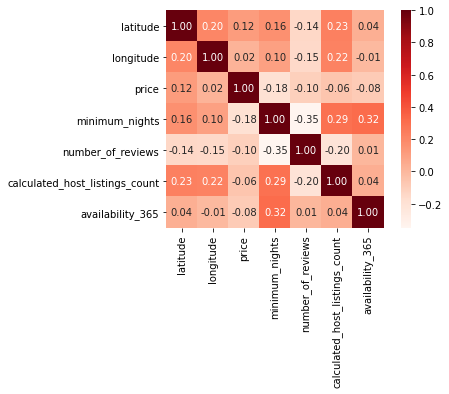

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='Reds', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

Uma outra informação interessante quando se deseja entender as relações de oferta e demanda é a criação de clusters de tipo de imóveis. Quanto mais opções de tipos de imóveis, maiores as chances dos usuários encontrarem o que buscam para suas estadias.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4689
Private room       2850
Shared room         288
Hotel room          103
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.591299
Private room       0.359395
Shared room        0.036318
Hotel room         0.012989
Name: room_type, dtype: float64

É possível ver uma quantidade bem pequena de quartos compartilhados e quartos de hotéis disponíveis.

Isso pode ser reflexo da demanda do mercado, ou seja, usuários buscam menos por esse tipo de opção e naturalmente os anunciantes optam por outras alternativas como o quarto privado.

Por outro lado, pode ser que exista uma demanda que não está sendo suprida pelos anunciantes, e com os dados de pesquisa dos usuários o Airbnb consegue descobrir também essa informação.

### **Qual a localidade mais cara do dataset?**



O preço médio do aluguel em determinados pontos da cidade é uma informação valiosa em diversas situações. O dono de uma propriedade poderia analisar os dados para definir decidir se vale a pena anunciar na plataforma, ou mesmo definir o preço a ser cobrado. Turistas poderiam usar a informação para direcionar suas pesquisas. E o Airbnb pode usar para realizar recomendações personalizadas aos seus usuários (se é que já não o faz).

A comparação será restrita a bairros que possuam pelo menos 30 propriedades anunciadas, como forma de garantir que bairros com poucas propriedades tenham valores equivocados estimados pela média.

In [ ]:
# encontrar bairros que possuem menos de 30 entradas no AirBNB

freq = pd.DataFrame(df_clean.neighbourhood.value_counts())
freq.drop(freq[freq.neighbourhood > 30].index, axis=0, inplace=True)

# calcular preço médio da diária nos bairros da cidade

meanprice=df_clean.groupby(['neighbourhood']).price.mean()

# remover bairros que possuem menos de 30 entradas e listar os 10 bairros mais caros

meanprice.drop(freq.index, axis=0, inplace=True)
meanprice.sort_values(ascending=False)[:10]


neighbourhood
Russian Hill           297.164179
Pacific Heights        291.634615
Marina                 284.715909
Glen Park              252.103448
Twin Peaks             246.753846
Castro/Upper Market    242.911695
Noe Valley             234.804487
North Beach            226.098655
Potrero Hill           223.278481
South of Market        210.527005
Name: price, dtype: float64

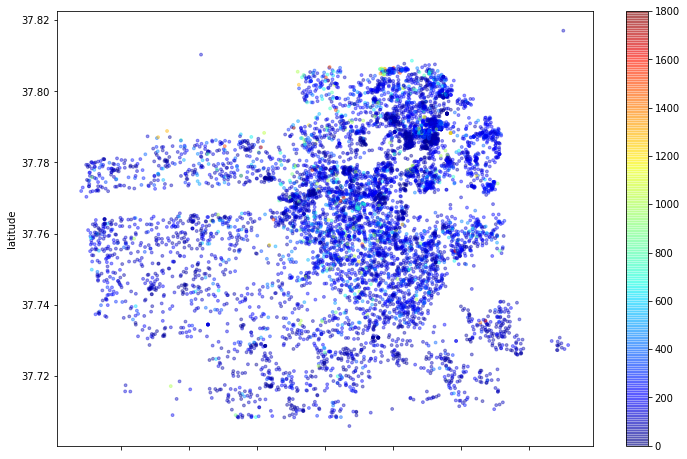

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

No mapa acima é possível visualizar a distribuição das propriedades anunciadas no Airbnb em San Francisco, assim como o preço cobrado por elas. É possível perceber que a quantidade de propriedades anunciadas é maior na região nordeste da cidade. Faz muito sentido, uma vez que é a região em que a maior parte dos pontos turísticos como o Pier, Bay Bridge e a embarcação para o presídio de Alcatraz se encontram. Com seu novo modelo de negócio de "Experiências" o Airbnb poderia incentivar empresas a oferecerem mais experiências na região Nordeste, e assim aumentar seus lucros em pacotes de acomodação com experiências inclusas.

<br>

A existência de alguns preços extremamente altos acaba distorcendo a escala e dificulta a visualização das regiões com preços mais altos, portanto iremos ajustar a escala.

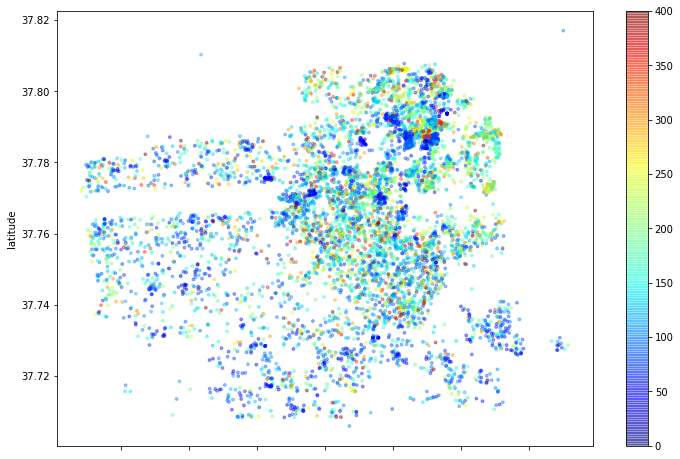

In [ ]:
df_price = df_clean.drop(df_clean[df_clean.price > 400].index, axis=0)
df_price.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_price['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

Com uma escala mais adequada é possível ver que a maioria dos preços mais caros se encontram na região nordeste, mas existe uma certa distribuição deles pela cidade. O que de fato mais chama a atenção no mapa são algumas "ilhas" de propriedades com aluguéis bem mais baratos na região nordeste. Seriam regiões com propriedades piores, ou com opções apenas de quartos para alugar? Essas são investigações que poderiam prosseguir com esse mesmo conjunto de dados e a criação de outros agrupamentos.

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Diversos proprietários definem duração mínima para a estadia em suas acomodações, como forma de garantir aluguéis para um fim de semana completo, por exemplo, ou para diminuir a frequência de hóspedes e facilitar a gestão.

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.mean()

# convertendo para um valor com mais significado prático

round(df_clean.minimum_nights.mean())

16

Como foi possível visualizar na análise prática dos dados, muitos proprietários alugam pelo Airbnb com a exigência de pelo menos 30 dias de permanência. Já um outro grupo de proprietários anuncia com uma permanência mínima de um ou dois dias. O resultado é um valor médio intermediário, 16 dias. Esse é mais um exemplo da importância da análise prática, pois o valor de 16 noites é pouco representativo do comportamento dos dados, que apresentam um comportamento sistemático dos anunciantes. Ao analisar apenas a média pode-se chegar à conclusão errada da disponibilidade de aluguéis na cidade e tomar decisões de negócio equivocadas.

## Conclusões


O exemplo acima envolve uma análise relativamente simples dos dados. Mas é possível perceber a quantidade e a diversidade de problemas que podem ser resolvidos com os dados processados da maneira correta. 

De posse desses dados o Airbnb poderia conduzir projetos para:
* Utilizar os dados em campanhas de marketing direcionado para donos de propriedades em regiões específicas.
* Incentivar o aluguel de quartos privados ou compartilhados, criando mais possibilidades de aluguel para turistas com orçamentos menores e ganhando em escala.
* Tentar adequar a oferta de diferentes tipos de acomodação com a demanda, conseguindo diminuir a ociosidade das propriedades disponíveis.
* Incentivar o aluguel de curto prazo para que mais propriedades estejam disponíveis quando um usuário pesquisa para uma estadia de poucos dias.
* Incentivar empresas a oferecerem mais experiências na região Nordeste, e assim aumentar seus lucros em pacotes de acomodação com experiências inclusas.

Projetos como os mencionados acima em uma cidade turística como San Francisco podem facilmente aumentar o faturamento da empresa em **centenas de milhares de dólares.**

<br>

Obviamente uma empresa de tecnologia do porte da Airbnb conhece o poder dos seus bancos de dados e realiza não somente as análises acima como muitas outras. Mas muitas empresas com menos familiaridade com soluções tecnológicas possuem dados tão poderosos quanto esses, ou ao menos a capacidade de coletá-los sem grandes investimentos, e ainda não os utilizam para otimizar recursos e direcionar a tomada de decisão. **A Ciência de Dados foi literalmente a base da jornada de gigantes como Aibnb, Netflix, Google e Facebook**, e cada vez mais empresas de pequeno e médio porte adotam esse pensamento para atingirem suas visões e missões. A presença de cientistas de dados em posições estratégicas permite a mudança de toda a cultura da empresa e assim um desdobramento em todos os setores do negócio, como vendas, serviços, marketing, recursos humanos, para citar alguns. **Essa tem sido a chave do sucesso de startups** e em breve irá se tornar uma necessidade mínima para a sobrevivência de um modelo de negócio.